<a href="https://colab.research.google.com/github/dikoharyadhanto/Data-Visualization-Documentation/blob/main/Data_Visualization_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Persiapan Dataset**

In [1]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:
   order_id  order_date  customer_id  ...    brand quantity item_price
0   1703458  2019-10-17        14004  ...  BRAND_J       10     740000
1   1706815  2019-10-24        17220  ...  BRAND_R        2     604000
2   1710718  2019-11-03        16518  ...  BRAND_C        8    1045000
3   1683592  2019-08-19        16364  ...  BRAND_A        4     205000
4   1702573  2019-10-16        15696  ...  BRAND_R        2    4475000

[5 rows x 9 columns]


In [2]:
# Penambahan Kolom Order Month
import datetime
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())

   order_id  order_date  customer_id  ... quantity item_price order_month
0   1703458  2019-10-17        14004  ...       10     740000     2019-10
1   1706815  2019-10-24        17220  ...        2     604000     2019-10
2   1710718  2019-11-03        16518  ...        8    1045000     2019-11
3   1683592  2019-08-19        16364  ...        4     205000     2019-08
4   1702573  2019-10-16        15696  ...        2    4475000     2019-10

[5 rows x 10 columns]


In [3]:
dataset['gmv'] = dataset['item_price']*dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:
   order_id  order_date  customer_id  ... item_price order_month      gmv
0   1703458  2019-10-17        14004  ...     740000     2019-10  7400000
1   1706815  2019-10-24        17220  ...     604000     2019-10  1208000
2   1710718  2019-11-03        16518  ...    1045000     2019-11  8360000
3   1683592  2019-08-19        16364  ...     205000     2019-08   820000
4   1702573  2019-10-16        15696  ...    4475000     2019-10  8950000

[5 rows x 11 columns]


In [4]:
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000


# **Case 1: Menentukan brand top 5**

Buat variabel baru (e.g. dataset_top5brand_dec) yang berisi data penjualan bulan Desember 2019, hanya untuk top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019. Sebutkan top 5 brands tersebut! Untuk visualisasi-visualisasi selanjutnya, hanya gunakan data frame ini.

In [5]:
#mengambil informasi top 5 brands berdasarkan quantity
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))

#membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & 
                                (dataset['brand'].isin(top_brands['brand'].to_list()))]

# print top brands
print(top_brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


In [6]:
dataset_top5brand_dec.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
8,1741846,2019-12-30,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32,450000,2019-12,14400000
14,1734790,2019-12-18,17422,Jakarta Selatan,DKI Jakarta,P0122,BRAND_A,12,695000,2019-12,8340000
19,1731961,2019-12-13,13880,Bogor,Jawa Barat,P2853,BRAND_R,6,740000,2019-12,4440000
35,1741561,2019-12-29,13521,Bandung,Jawa Barat,P3344,BRAND_S,2,520000,2019-12,1040000
38,1735633,2019-12-19,17096,Jakarta Selatan,DKI Jakarta,P3285,BRAND_S,4,1325000,2019-12,5300000


# **Case 2: Multi-line chart daily quantity untuk brand top 5**

Buat visualisasi multi-line chart untuk daily quantity terjualnya, breakdown per brand. Maka, akan terlihat 1 tanggal di mana ada salah satu brand yang mengalami lonjakan (quantity lebih tinggi dari tanggal-tanggal lain). Beri anotasi untuk titik lonjakan tersebut.

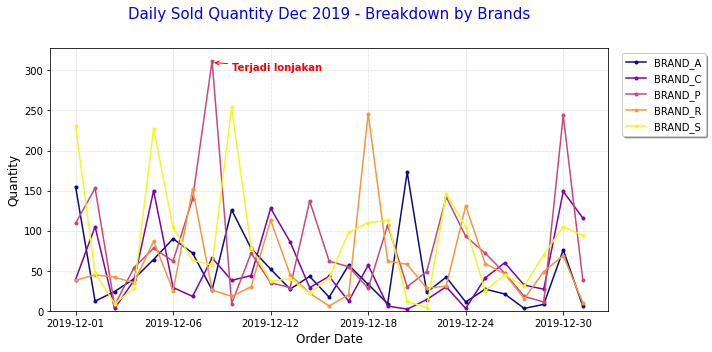

In [7]:
import matplotlib.pyplot as plt
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

# **Case 3: Kuantitas penjualan brand top 5 selama Desember 2019**

Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak.

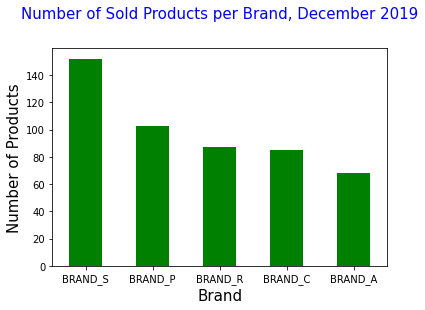

In [8]:
import matplotlib.pyplot as plt
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

# **Case 4: Penjulan produk diatas 100 dan dibawah 100 selama Desember 2019**

Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak.

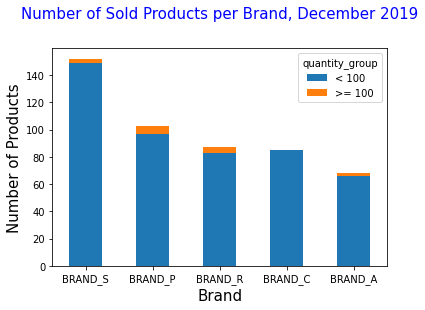

In [9]:
import matplotlib.pyplot as plt
#membuat dataframe baru, untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x >= 100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

#plot stacked barchart
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

# **Case 5: Murah atau mahalkah harga produk brand top 5**

Gunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand tersebut (untuk tiap product_id, ambil median harganya). Bagaimana persebaran harga product nya? Cenderung banyak yang murah atau yang mahal?

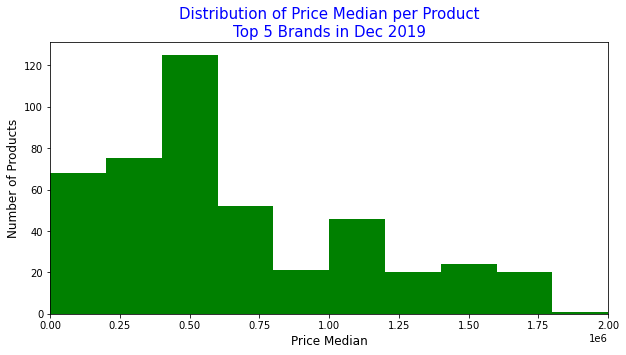

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='green')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()

# **Case 6a: Korelasi quantity vs GMV**

Untuk setiap product_id, cek scatterplot antara  quantity dan GMV, apakah ada korelasi? Bagaimana dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

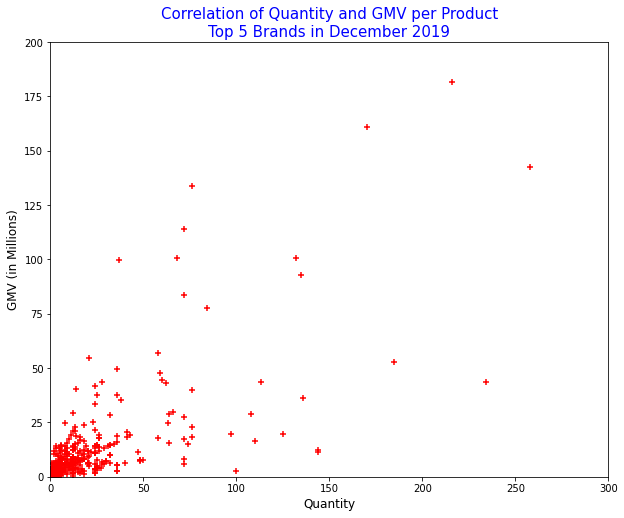

In [11]:
import matplotlib.pyplot as plt
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

# **Case 6b: Korelasi median harga vs quantity**

Untuk setiap product_id, cek scatterplot antara  quantity dan GMV sudah kamu lakukan pada Case 6a? Untuk Case 6b ini bagaimanakah dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

<Figure size 432x288 with 0 Axes>

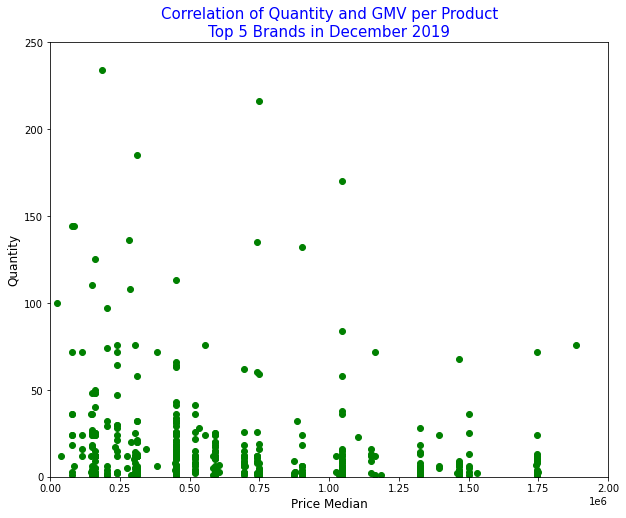

In [12]:
import matplotlib.pyplot as plt
plt.clf()
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()